In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### ANALISI ESPLORATIVA DATASET RATING USER x ITEM

In [21]:
col = ['user', 'item', 'rating', 'timestamp']
df = pd.read_csv("ml-100k/u.data", sep='\t', names=col)
df.head()

,user,item,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user       100000 non-null  int64
 1   item       100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [4]:
df.nunique()

user           943
item          1682
rating           5
timestamp    49282
dtype: int64

Text(0, 0.5, 'Numero di elementi univoci')

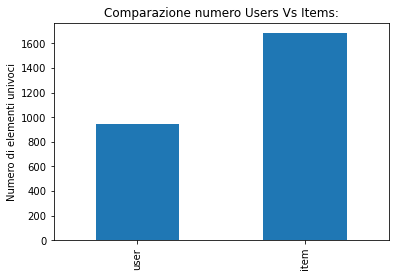

In [5]:
df[["user", "item"]].nunique().plot(kind="bar")

plt.title('Comparazione numero Users Vs Items:')
plt.ylabel('Numero di elementi univoci')

In [32]:
df.rating.mean()

3.52986

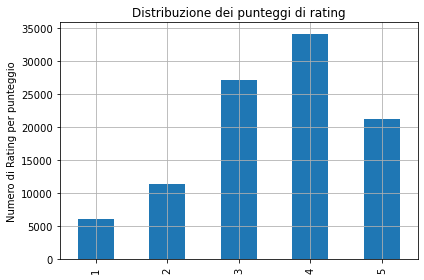

In [6]:
df.rating.value_counts().sort_index().plot(kind='bar')

plt.title('Distribuzione dei punteggi di rating')
plt.ylabel('Numero di Rating per punteggio')
plt.grid()
plt.tight_layout()

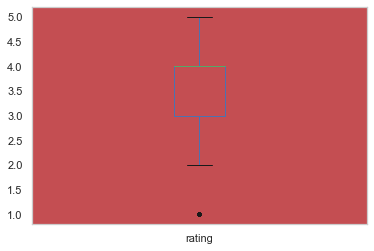

In [71]:
rating_boxplot = df.rating.plot.box(vert=True, sym='k.')
rating_boxplot.set_facecolor('r')

plt.grid(False)
plt.box(True)

In [8]:
df["rating"].describe()

count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [9]:
df.value_counts("user").sort_values(ascending=False)[0:10]

user
405    737
655    685
13     636
450    540
276    518
416    493
537    490
303    484
234    480
393    448
dtype: int64

Text(0, 0.5, 'Numero di Rating')

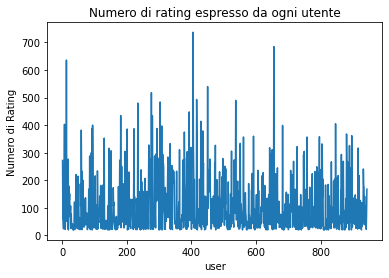

In [10]:
df.value_counts("user").sort_index().plot(kind="line")

plt.title('Numero di rating espresso da ogni utente')
plt.ylabel('Numero di Rating')

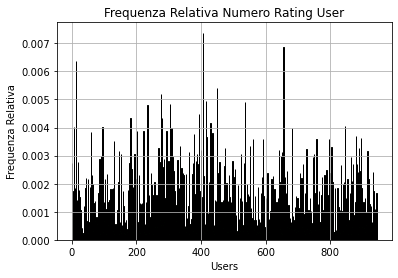

In [11]:
df.user.hist(
    bins=943,
    edgecolor='k',
    facecolor='green',
    density=True #Frequenza Relativa
)

plt.title("Frequenza Relativa Numero Rating User")
plt.ylabel('Frequenza Relativa')
plt.xlabel('Users')
# plt.xticks(range(60, 300, 20))
plt.grid(True)
plt.box(True)

Text(0, 0.5, 'Numero di Rating')

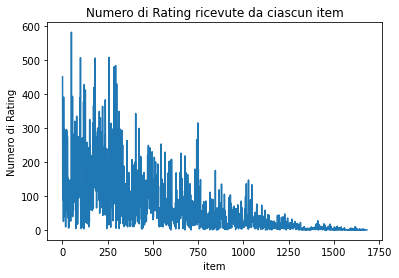

In [12]:
df.value_counts("item").sort_index().plot(kind="line")

plt.title('Numero di Rating ricevute da ciascun item')
plt.ylabel('Numero di Rating')

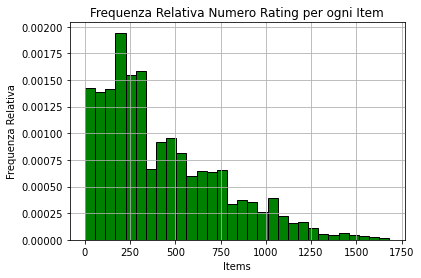

In [13]:
df.item.hist(
    bins=30,
    edgecolor='k',
    facecolor='green',
    density=True #Frequenza Relativa
)

plt.title("Frequenza Relativa Numero Rating per ogni Item")
plt.ylabel('Frequenza Relativa')
plt.xlabel('Items')
# plt.xticks(range(60, 300, 20))
plt.grid(True)
plt.box(True)

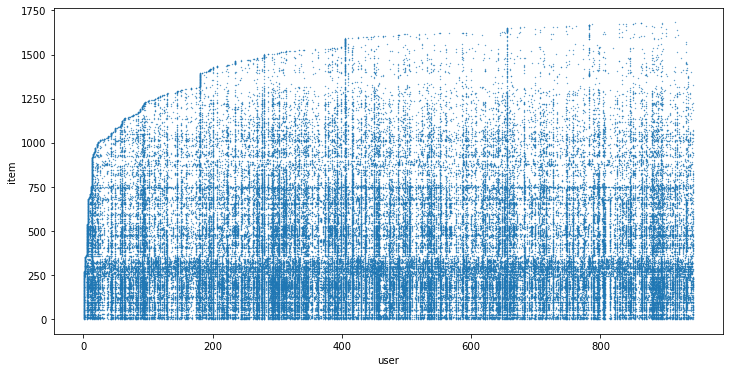

In [14]:
df[["user", "item"]].plot.scatter(x="user", y="item", s=0.1)

plt.rcParams.update({'font.size': 12})
fig = plt.gcf()
fig.set_size_inches(12, 6)

## DATASET ITEM

In [20]:
item_col = ["movie_id","movie_title","release_date","video_release_date",
"IMDb_URL","unknown","Action","Adventure","Animation",
"Children's","Comedy","Crime","Documentary","Drama","Fantasy",
"Film_Noir","Horror","Musical","Mystery","Romance","Sci_Fi",
"Thriller","War","Western"]


item_df = pd.read_csv("ml-100k/u.item", sep='|', names = item_col, encoding='latin-1')
item_df.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [26]:
item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            1682 non-null   int64  
 1   movie_title         1682 non-null   object 
 2   release_date        1681 non-null   object 
 3   video_release_date  0 non-null      float64
 4   IMDb_URL            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Children's          1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film_Noir           1682 non-null   int64  
 16  Horror

In [27]:
item_df.describe()

,movie_id,video_release_date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western
count,1682.000000,0.0,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,...,1682.00000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000
mean,841.500000,NaN,0.001189,0.149227,0.080262,0.024970,0.072533,0.300238,0.064804,0.029727,...,0.01308,0.014269,0.054697,0.033294,0.036266,0.146849,0.060048,0.149227,0.042212,0.016052
std,485.695893,NaN,0.034473,0.356418,0.271779,0.156081,0.259445,0.458498,0.246253,0.169882,...,0.11365,0.118632,0.227455,0.179456,0.187008,0.354061,0.237646,0.356418,0.201131,0.125714
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,421.250000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,841.500000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1261.750000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## USER DATASET

In [16]:
user_col = ["user_id", "age", "gender", "occupation", "zip_code"]

user_df = pd.read_csv("ml-100k/u.user", sep='|', names=user_col)
user_df.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [17]:
user_df.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [102]:
user_df.occupation.unique()

array(['technician', 'other', 'writer', 'executive', 'administrator',
       'student', 'lawyer', 'educator', 'scientist', 'entertainment',
       'programmer', 'librarian', 'homemaker', 'artist', 'engineer',
       'marketing', 'none', 'healthcare', 'retired', 'salesman', 'doctor'],
      dtype=object)

## MERGED DATASET

In [120]:
merged_df = pd.merge(df, item_df, left_on='item', right_on='movie_id')
merged_df.head()

,user,item,rating,timestamp,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western
0,196,242,3,881250949,242,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,...,0,0,0,0,0,0,0,0,0,0
1,63,242,3,875747190,242,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,...,0,0,0,0,0,0,0,0,0,0
2,226,242,5,883888671,242,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,...,0,0,0,0,0,0,0,0,0,0
3,154,242,3,879138235,242,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,...,0,0,0,0,0,0,0,0,0,0
4,306,242,5,876503793,242,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,...,0,0,0,0,0,0,0,0,0,0


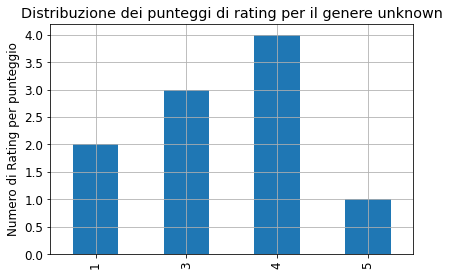

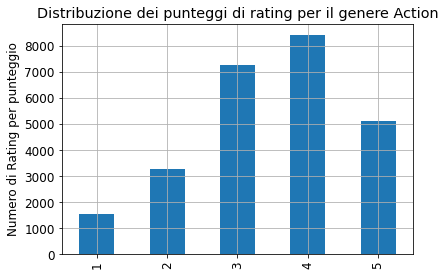

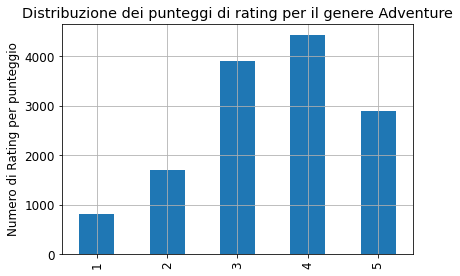

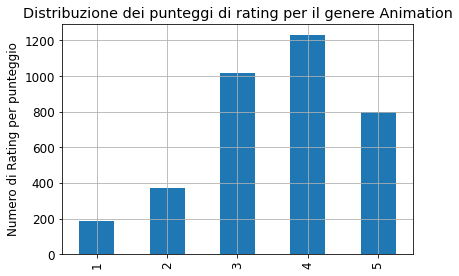

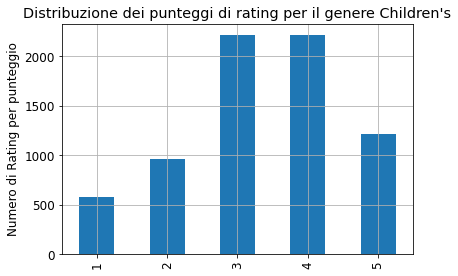

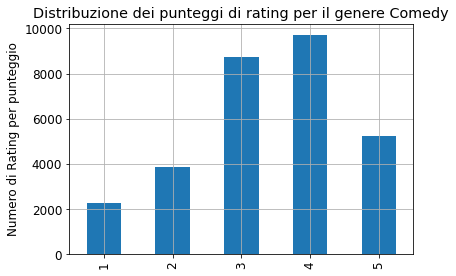

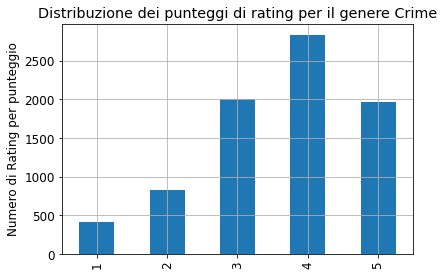

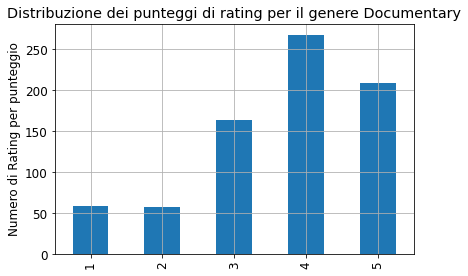

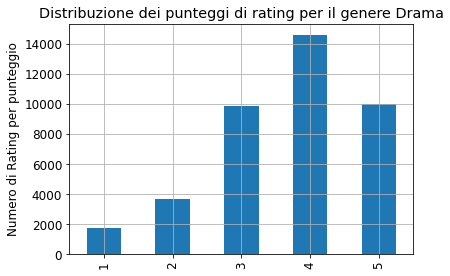

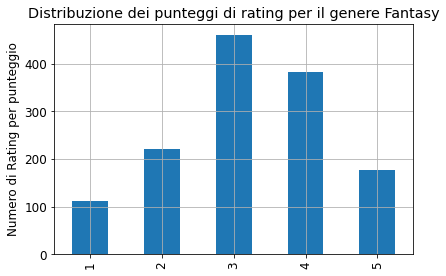

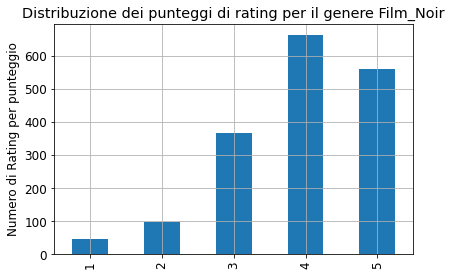

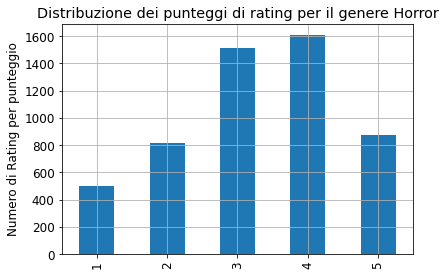

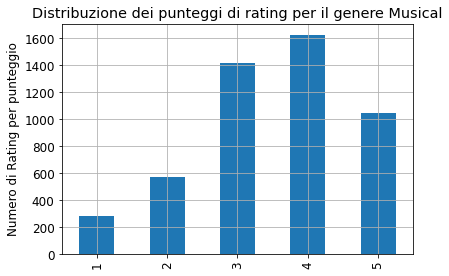

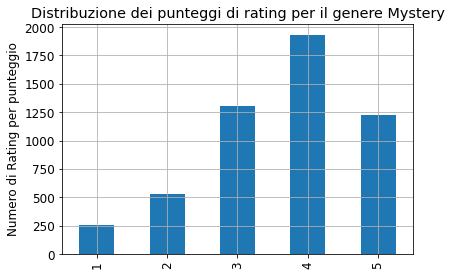

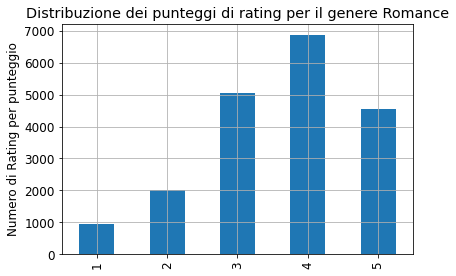

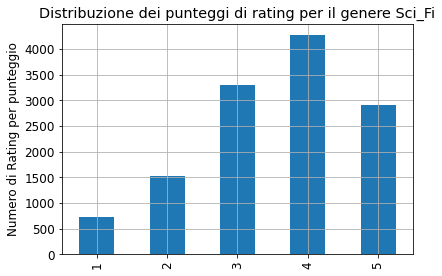

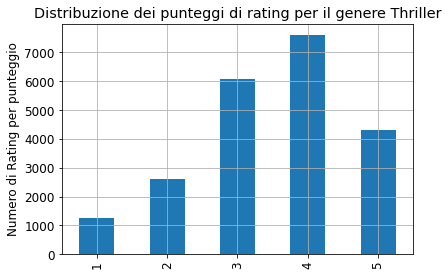

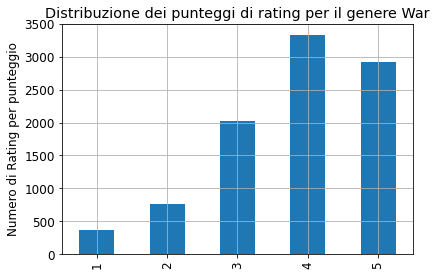

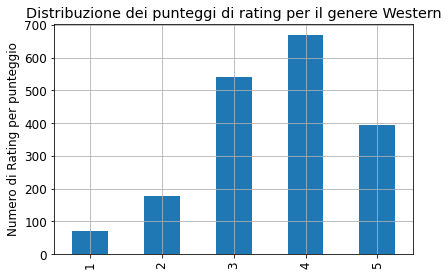

In [30]:
genres = ["unknown","Action","Adventure","Animation",
"Children's","Comedy","Crime","Documentary","Drama","Fantasy",
"Film_Noir","Horror","Musical","Mystery","Romance","Sci_Fi",
"Thriller","War","Western"]

for g in genres:
    plt.figure()
    selected = merged_df[merged_df[g] == 1]
    selected.rating.value_counts().sort_index().plot(kind='bar')
    plt.title('Distribuzione dei punteggi di rating per il genere ' + str(g))
    plt.ylabel('Numero di Rating per punteggio')
    plt.grid()
    plt.tight_layout()
    
    # Show/save figure as desired.
plt.show()
# Can show all four figures at once by calling plt.show() here, outside the loop.
#plt.show()
    

In [60]:
rating_mean = {}

rating_mean['genres'] = ["All"]
rating_mean['mean_rating'] = [merged_df.rating.mean()]
rating_mean['number'] = [merged_df.item.nunique()]
rating_mean['rating_number'] = [merged_df.item.count()]
rating_mean['rating_number_ratio'] = [merged_df.item.count()/merged_df.item.nunique()]

genres = ["unknown","Action","Adventure","Animation",
"Children's","Comedy","Crime","Documentary","Drama","Fantasy",
"Film_Noir","Horror","Musical","Mystery","Romance","Sci_Fi",
"Thriller","War","Western"]

print(rating_mean.values())

for g in genres:
    selected = merged_df[merged_df[g] == 1]
    rating_mean['genres'].append(g)
    rating_mean['mean_rating'].append(selected.rating.mean())
    rating_mean['number'].append(selected.item.nunique())
    rating_mean['rating_number'].append(selected.item.count())
    rating_mean['rating_number_ratio'].append(selected.item.count()/selected.item.nunique())

df_genre_mean_rating = pd.DataFrame(data=rating_mean)  
df_genre_mean_rating.head()

dict_values([['All'], [3.52986], [1682], [100000], [59.45303210463734]])


,genres,mean_rating,number,rating_number,rating_number_ratio
0,All,3.529860,1682,100000,59.453032
1,unknown,3.200000,2,10,5.000000
2,Action,3.480245,251,25589,101.948207
3,Adventure,3.503527,135,13753,101.874074
4,Animation,3.576699,42,3605,85.833333


Text(0.5, 1.0, 'MEDIA RATING PER GENERE')

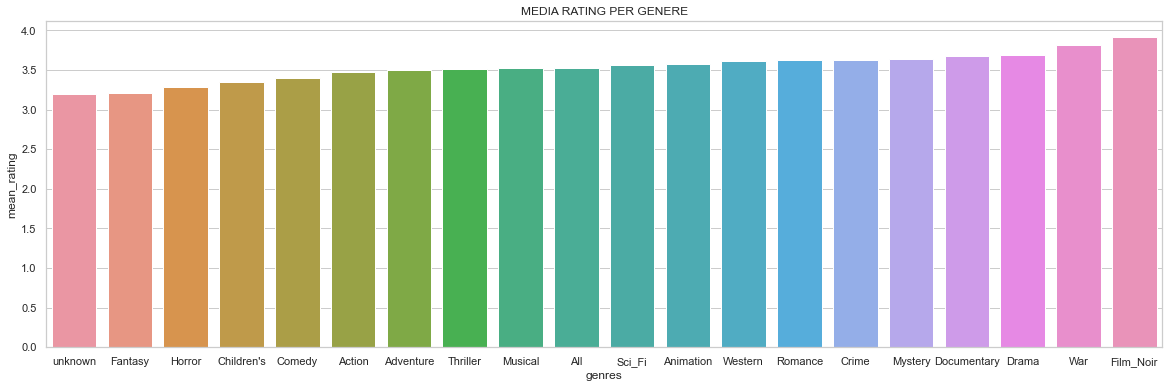

In [62]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="genres", y="mean_rating", data=df_genre_mean_rating.sort_values("mean_rating"))
fig = plt.gcf()
fig.set_size_inches(20, 6)
plt.title("MEDIA RATING PER GENERE")

# Non si evidenzia una grossa differenza in base al genere

Text(0.5, 1.0, 'NUMERO DI VALUTAZIONI PER GENERE')

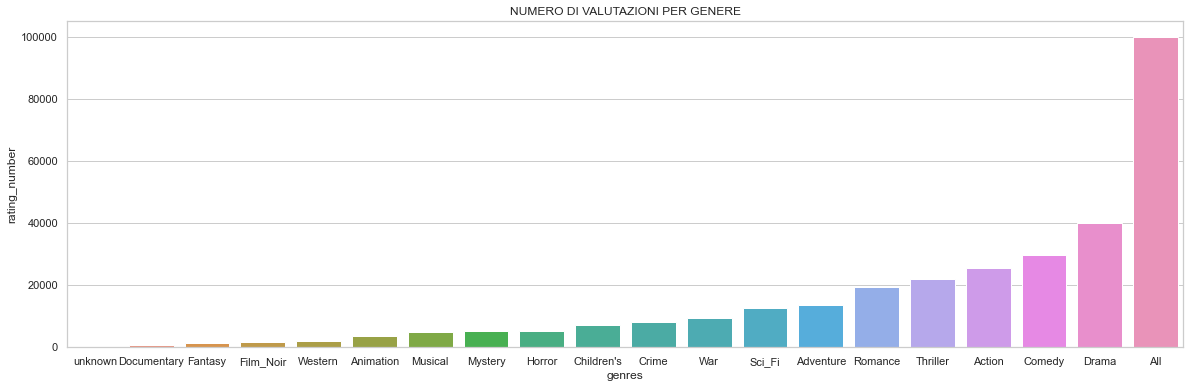

In [63]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="genres", y="rating_number", data=df_genre_mean_rating.sort_values("rating_number"))
fig = plt.gcf()
fig.set_size_inches(20, 6)
plt.title("NUMERO DI VALUTAZIONI PER GENERE")

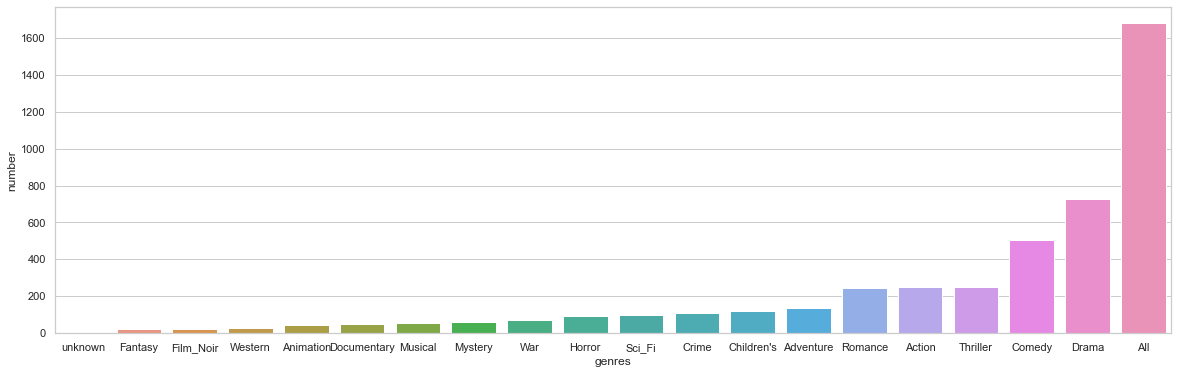

In [58]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="genres", y="number", data=df_genre_mean_rating.sort_values("number"))
fig = plt.gcf()
fig.set_size_inches(20, 6)
plt.title("NUMERO DI FILM PER OGNI GENERE")

Text(0.5, 1.0, "FILM PIU' VALUTATI")

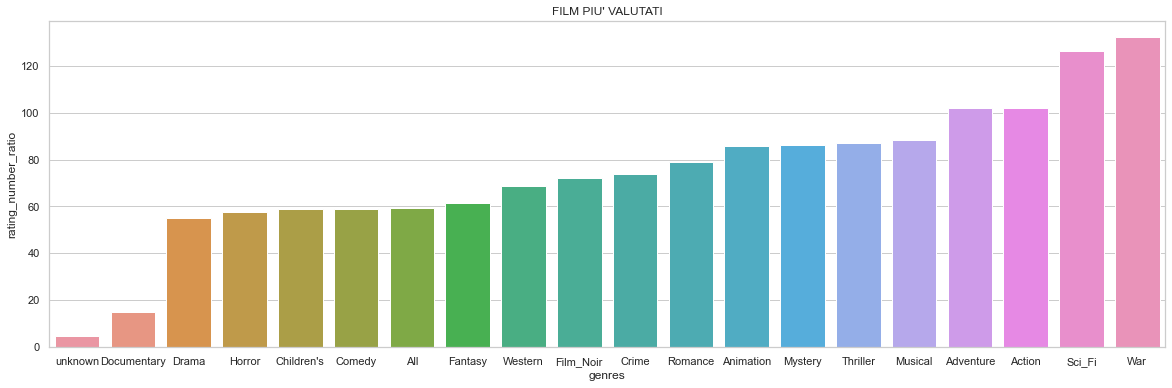

In [64]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="genres", y="rating_number_ratio", data=df_genre_mean_rating.sort_values("rating_number_ratio"))
fig = plt.gcf()
fig.set_size_inches(20, 6)
plt.title("FILM PIU' VALUTATI")

In [122]:
merged_df = pd.merge(merged_df, user_df, left_on='user', right_on='user_id')
merged_df.head()

,user,item,rating,timestamp,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,...,Romance,Sci_Fi,Thriller,War,Western,user_id,age,gender,occupation,zip_code
0,196,242,3,881250949,242,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,...,0,0,0,0,0,196,49,M,writer,55105
1,196,257,2,881251577,257,Men in Black (1997),04-Jul-1997,NaN,http://us.imdb.com/M/title-exact?Men+in+Black+...,0,...,0,1,0,0,0,196,49,M,writer,55105
2,196,111,4,881251793,111,"Truth About Cats & Dogs, The (1996)",26-Apr-1996,NaN,http://us.imdb.com/M/title-exact?Truth%20About...,0,...,1,0,0,0,0,196,49,M,writer,55105
3,196,25,4,881251955,25,"Birdcage, The (1996)",08-Mar-1996,NaN,"http://us.imdb.com/M/title-exact?Birdcage,%20T...",0,...,0,0,0,0,0,196,49,M,writer,55105
4,196,382,4,881251843,382,"Adventures of Priscilla, Queen of the Desert, ...",01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Adventures%20...,0,...,0,0,0,0,0,196,49,M,writer,55105


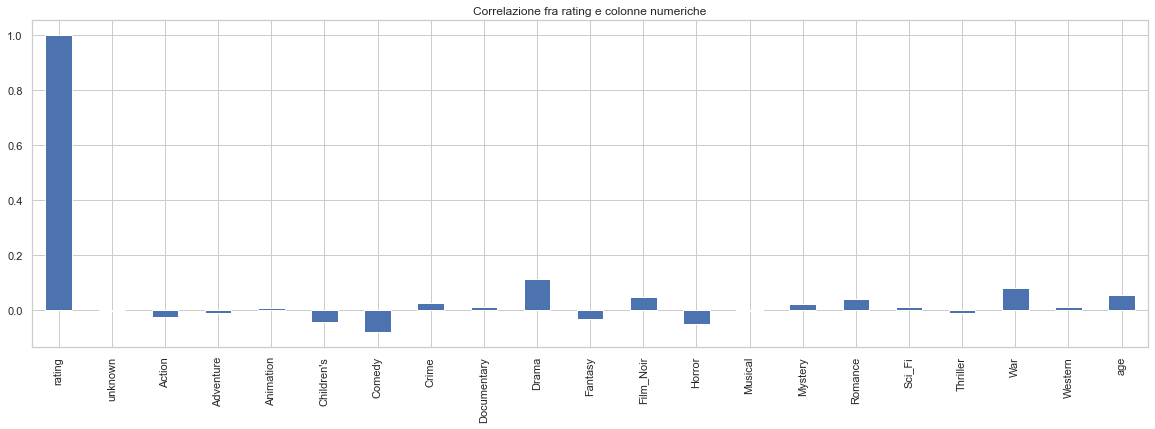

In [99]:
corr_columns = ["rating", "unknown","Action","Adventure","Animation",
"Children's","Comedy","Crime","Documentary","Drama","Fantasy",
"Film_Noir","Horror","Musical","Mystery","Romance","Sci_Fi",
"Thriller","War","Western", "age"]

merged_df[corr_columns].corr(method='pearson')['rating'][:].plot(kind='bar')
plt.title("Correlazione fra rating e colonne numeriche")
fig = plt.gcf()
fig.set_size_inches(20, 6)

# Nessuna correlazione significatica fra rating e le altre colonne

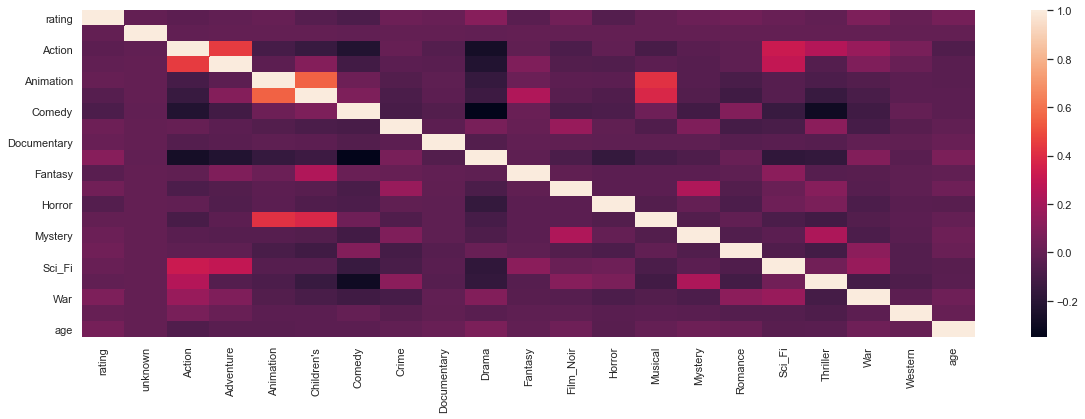

In [105]:


sns.heatmap(merged_df[corr_columns].corr(method='pearson'))
fig = plt.gcf()
fig.set_size_inches(20, 6)

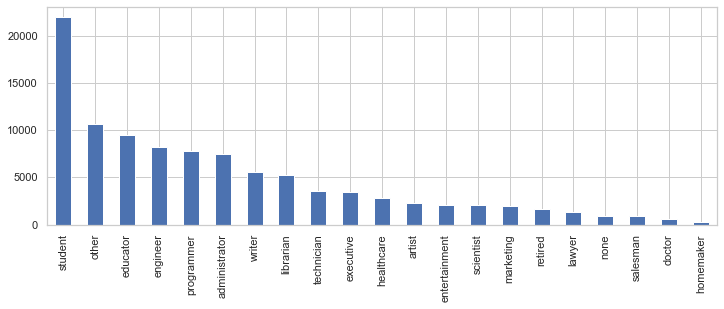

In [114]:
merged_df.occupation.value_counts().sort_values(ascending=False).plot(kind='bar')
fig = plt.gcf()
fig.set_size_inches(12, 4)

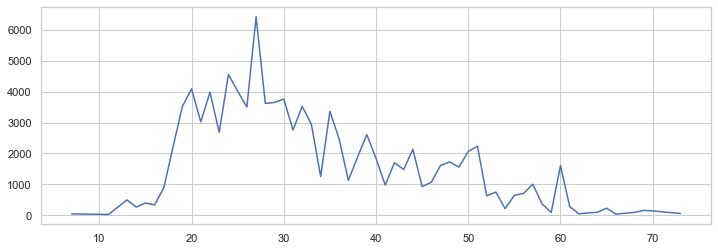

In [118]:
merged_df.age.value_counts().sort_index(ascending=True).plot(kind='line')
fig = plt.gcf()
fig.set_size_inches(12, 4)

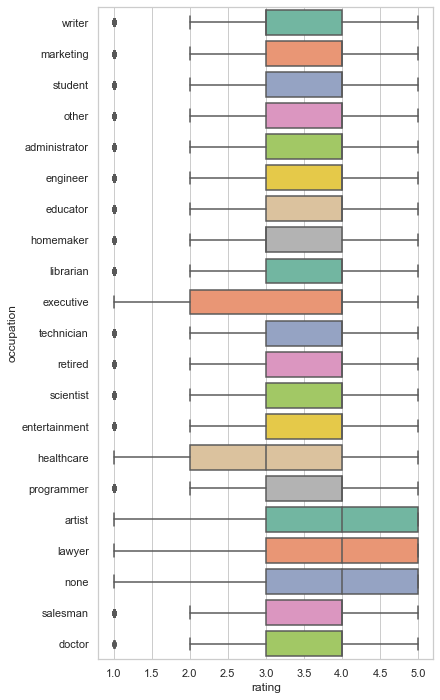

In [130]:
ax = sns.boxplot(x="rating", y="occupation", data=merged_df, orient="h", palette='Set2')

fig = plt.gcf()
fig.set_size_inches(6, 12)